In [24]:
%matplotlib inline

import os
from pathlib import Path
import sys
import matplotlib.pyplot as plt

In [4]:
project_name = 'healthcareai'
project_path = Path(os.getcwd()).parent

if sys.platform == "win32":
    data_path = 'D:\Dataset\{0}\dataset'.format(project_name)
    model_path = 'D:\Dataset\{0}\models'.format(project_name)
    src_path = '/Volumes/Dataset/{0}/src'.format(project_name)
    
elif sys.platform == 'darwin':
    data_path = '/Volumes/Dataset/{0}/dataset'.format(project_name)
    model_path = '/Volumes/Dataset/{0}/models'.format(project_name)
    src_path = '/Volumes/Dataset/{0}/src'.format(project_name)
    
else:
    data_path = Path(project_path, 'dataset')
    model_path = Path(project_path, 'models')
    src_path = Path(project_path, 'src')
    image_path = Path(data_path, 'images')

utils_path = str(Path(project_path, 'utils'))
# including the project folder and the utils folder
if utils_path not in ''.join(sys.path):
    sys.path.extend([str(project_path), utils_path, str(src_path)])

print('project path = {0}'.format(project_path))
print('data path = {0}'.format(data_path))
print('model path = {0}'.format(model_path))
print('sys.path = {0}'.format(sys.path))

project path = /home/guerramarj/github/healthcareai
data path = /home/guerramarj/github/healthcareai/dataset
model path = /home/guerramarj/github/healthcareai/models
sys.path = ['/cm/local/apps/cuda/libs/current/pynvml', '/home/guerramarj/packages/anaconda3/envs/deeplearning/lib/python36.zip', '/home/guerramarj/packages/anaconda3/envs/deeplearning/lib/python3.6', '/home/guerramarj/packages/anaconda3/envs/deeplearning/lib/python3.6/lib-dynload', '', '/home/guerramarj/packages/anaconda3/envs/deeplearning/lib/python3.6/site-packages', '/home/guerramarj/packages/anaconda3/envs/deeplearning/lib/python3.6/site-packages/Mako-1.0.7-py3.6.egg', '/home/guerramarj/packages/anaconda3/envs/deeplearning/lib/python3.6/site-packages/IPython/extensions', '/home/guerramarj/.ipython', '/home/guerramarj/github/healthcareai', '/home/guerramarj/github/healthcareai/utils', '/home/guerramarj/github/healthcareai/src']


In [5]:
os.listdir(image_path)

['ISIC_0008534.jpg',
 'ISIC_0008532.jpg',
 'ISIC_0008528.jpg',
 'ISIC_0008533.jpg',
 'ISIC_0008530.jpg',
 'ISIC_0008529.jpg',
 'ISIC_0008531.jpg']

In [11]:
from PIL import Image
import pandas as pd
import numpy as np

In [40]:
for image_filename_ix, image_filename in enumerate(os.listdir(image_path)):
    x = Path(image_path, image_filename)
    if image_filename_ix == 0:
        val = np.asarray(Image.open(x).resize((100,75)))
        tile_df = pd.DataFrame({'file':image_filename, 'image':[val]})
    else:
        tile_df = tile_df.append(pd.DataFrame({'file':image_filename, 'image':[val]}), ignore_index=False)

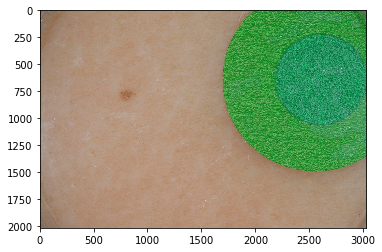

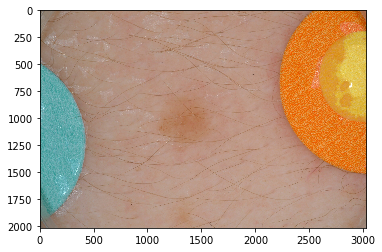

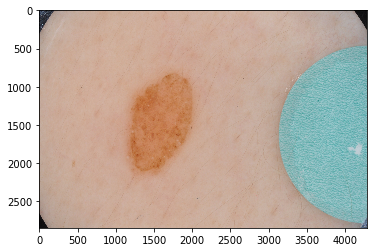

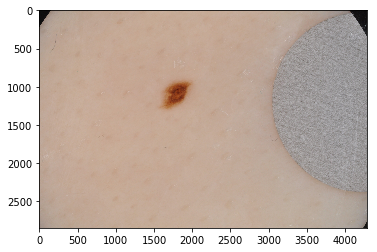

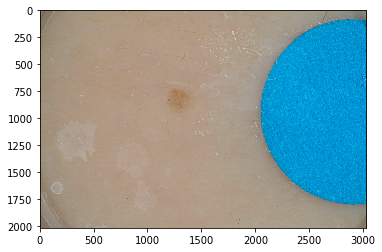

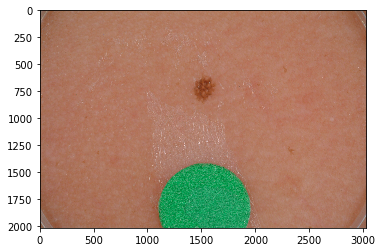

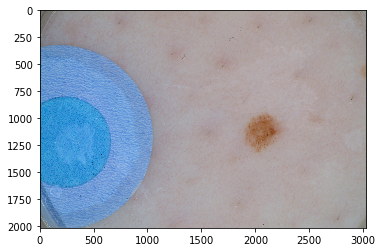

In [26]:
for image in image_list:
    img = Image.fromarray(image, 'RGB')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(img)

plt.show()

In [42]:
for image_filename_ix, image_filename in enumerate(os.listdir(image_path)):
    x = Path(image_path, image_filename)
    if image_filename_ix == 0:
        val = np.asarray(Image.open(x).resize((100,75)))
        tile_df = pd.DataFrame({'file':image_filename, 'image':[val]})
    else:
        tile_df = tile_df.append(pd.DataFrame({'file':image_filename, 'image':[val]}), ignore_index=False)
        
rgb_info_df = tile_df.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v in 
                                  zip(['Red', 'Green', 'Blue'], 
                                      np.mean(x['image'], (0, 1)))}),1)
gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1)
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec
rgb_info_df['Gray_mean'] = gray_col_vec

for c_col in rgb_info_df.columns:
    tile_df[c_col] = rgb_info_df[c_col].values

,Red_mean,Green_mean,Blue_mean,Gray_mean
0,1.058742,1.116657,0.824601,131.159956
0,1.058742,1.116657,0.824601,131.159956
